# Personal Auto - Killed and Seriously Injured Claims KSI (2008-2018) 

# Input Data From Toronto Plice Open Database

In [47]:
# Import pandas library
import pandas as pd
import urllib.request

!conda install -c conda-forge folium=0.5.0 --yes
import folium

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


## Import Data

In [57]:
# Read the downloaded  file by its local path , and assign it to variable "df"
df = pd.read_csv(r"C:\Users\e78202\Desktop\projects\Coursera_Capstone\claims.csv", header= 0)
df

ACCNUM  YEAR                      DATE               District  \
0      4003162994  2014  2014-10-24T04:00:00.000Z             North York   
1      6001093797  2016  2016-06-22T04:00:00.000Z         Etobicoke York   
2      6001093797  2016  2016-06-22T04:00:00.000Z         Etobicoke York   
3      6001093797  2016  2016-06-22T04:00:00.000Z         Etobicoke York   
4      6002153175  2016  2016-12-04T05:00:00.000Z  Toronto and East York   
...           ...   ...                       ...                    ...   
12239     1119725  2009  2009-07-26T04:00:00.000Z            Scarborough   
12240     1119725  2009  2009-07-26T04:00:00.000Z            Scarborough   
12241     1119725  2009  2009-07-26T04:00:00.000Z            Scarborough   
12242  4001787575  2014  2014-03-29T04:00:00.000Z            Scarborough   
12243  7003085452  2017  2017-11-28T05:00:00.000Z         Etobicoke York   

        LATITUDE  LONGITUDE           ACCLASS  Month  year_month  
0      43.767462 -79.412438  Non-Fatal Injury     10      201410  
1      43.718318 -79.516246  Non-Fatal Injury      6      201606  
2      43.718318 -79.516246  Non-Fatal Injury      6      201606  
3      43.718318 -79.516246  Non-Fatal Injury      6      201606  
4      43.662909 -79.374309  Non-Fatal Injury     12      201612  
...          ...        ...               ...    ...         ...  
12239  43.804445 -79.330990  Non-Fatal Injury      7      200907  
12240  43.804445 -79.330990  Non-Fatal Injury      7      200907  
12241  43.804445 -79.330990  Non-Fatal Injury      7      200907  
12242  43.791693 -79.228359  Non-Fatal Injury      3      201403  
12243  43.755858 -79.524242  Non-Fatal Injury     11      201711  

[12244 rows x 9 columns]

## Select KSI Claims For Q2

In [58]:
q1=df['Month'] > 3
q2=df['Month'] < 7
df=df[q1 & q2]
df.drop(['DATE'], axis=1, inplace= True)
df

C:\Users\e78202\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ACCNUM  YEAR               District   LATITUDE  LONGITUDE  \
1      6001093797  2016         Etobicoke York  43.718318 -79.516246   
2      6001093797  2016         Etobicoke York  43.718318 -79.516246   
3      6001093797  2016         Etobicoke York  43.718318 -79.516246   
11     7000609601  2017            Scarborough  43.767493 -79.228320   
12     7000609601  2017            Scarborough  43.767493 -79.228320   
...           ...   ...                    ...        ...        ...   
12222  4001912926  2014  Toronto and East York  43.696513 -79.297305   
12226   142049204  2014  Toronto and East York  43.652262 -79.401134   
12227   142049204  2014  Toronto and East York  43.652262 -79.401134   
12228   142049204  2014  Toronto and East York  43.652262 -79.401134   
12229   142049204  2014  Toronto and East York  43.652262 -79.401134   

                ACCLASS  Month  year_month  
1      Non-Fatal Injury      6      201606  
2      Non-Fatal Injury      6      201606  
3      Non-Fatal Injury      6      201606  
11     Non-Fatal Injury      4      201704  
12     Non-Fatal Injury      4      201704  
...                 ...    ...         ...  
12222  Non-Fatal Injury      4      201404  
12226             Fatal      5      201405  
12227             Fatal      5      201405  
12228             Fatal      5      201405  
12229             Fatal      5      201405  

[3214 rows x 8 columns]

# Display KPI Claims On The Mapping for Toronto

## Create The Map of Toronto

In [38]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [22]:
# create map and display it
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
toronto_map

## Display all KPI Claims on Map

In [24]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df.LATITUDE, df.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
toronto_map.add_child(incidents)

## Clustering KPI Claims in Map

In [25]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
toronto_map = folium.Map(location = [43.6534817, -79.3839347], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(toronto_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.LATITUDE, df.LONGITUDE, df.ACCLASS):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
toronto_map

# KSI Claims Prediction

## Aggregate KSI Claims by Year

In [59]:
#df.drop(['DATE'], axis=1, inplace= True)
df_annual =df.drop(['District','LATITUDE','LONGITUDE','Month'],axis=1)
df_annual
df=df_annual.groupby('YEAR',as_index= False).count()
df

YEAR  ACCNUM  ACCLASS  year_month
0   2008     369      369         369
1   2009     330      330         330
2   2010     311      311         311
3   2011     248      248         248
4   2012     335      335         335
5   2013     347      347         347
6   2014     240      240         240
7   2015     244      244         244
8   2016     260      260         260
9   2017     296      296         296
10  2018     234      234         234

## Performing regression Model on KSI Claims Counts 

In [66]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [67]:
x = df['YEAR']      # year on x-axis
y = df['ACCNUM']     # total on y-axis
fit = np.polyfit(x, y, deg=2)
fit

array([ 7.37762238e-01, -2.97993077e+03,  3.00934817e+06])

'No. Fatal and Seriously Injured Claim Counts = 1 * Year + -2980'

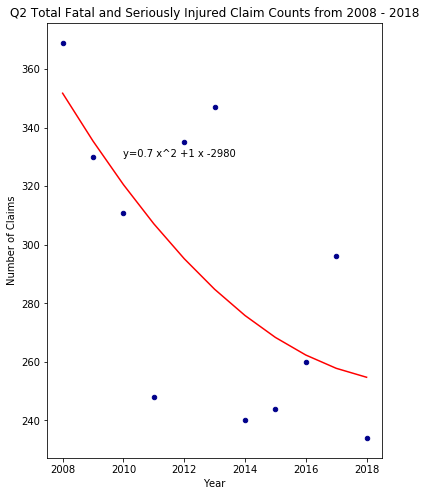

In [70]:
df.plot(kind='scatter', x='YEAR', y='ACCNUM', figsize=(6, 8), color='darkblue')

plt.title('Q2 Total Fatal and Seriously Injured Claim Counts from 2008 - 2018')
plt.xlabel('Year')
plt.ylabel('Number of Claims')

# plot line of best fit
plt.plot(x, fit[0] *x*x + fit[1]*x+fit[2], color='red') # recall that x is the Years
plt.annotate('y={0:.1f} x^2 +{0:.0f} x {1:.0f}'.format(fit[0], fit[1], fit[2]), xy=(2010, 330))


# print out the line of best fit
'No. Fatal and Seriously Injured Claim Counts = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

## Predicting 2020Q2 KSI Claim Counts Assuming no COVID-19 

In [63]:
x=2019
y_hat2019q2=fit[0] * x*x + fit[1]*x+fit[2]
y_hat2019q2

253.16363636497408

In [64]:
x=2020
y_hat2020q2=fit[0] * x*x + fit[1]*x+fit[2]
y_hat2020q2

253.05454545561224